In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency, ttest_ind
from scipy.stats.contingency import association

%matplotlib inline

In [5]:
# pip install openpyxl

<h2> Data Frames
     



df_final_demo: Client Profiles
df_final_experiement_clients = Experiment Roster (clients who participated on experiment)

df_pt1 and df_pt2 : web data initial files raw
df_final_web_data: concat df_pt1,df_pt2 web data

df_final_demo : Client Profiles
client_information_experiment = merge of df_final_demo and  df_final_experiement_clients (information of clients, participated or not in the experiment)

web_data_summary: no_of_visits, is_confirmed, duration, had_error, error_count no_of_confirms
web_data_summary_experiment = merge of web_data_summary and df_final_experiement_clients (web data summary and participation or not in the experiment)

In [6]:
# new version
df_final_demo = pd.read_csv('df_final_demo.txt')
df_pt1 = pd.read_csv('df_final_web_data_pt_1.txt', parse_dates=['date_time'])
df_pt2 = pd.read_csv('df_final_web_data_pt_2.txt', parse_dates=['date_time'])
df_final_experiement_clients = pd.read_csv('df_final_experiment_clients.txt')
df_final_web_data = pd.concat([df_pt1,df_pt2])

#old version
# cp = pd.read_csv("df_final_demo.txt")
# dfp1 = pd.read_csv("df_final_web_data_pt_1.txt")
# df_pt2 = pd.read_csv("df_final_web_data_pt_2.txt")
#dfp = concat of dfp1 and dfp2
#dfp_c = concat of dfp1 and dfp2 without duplicates

# exc = pd.read_csv("df_final_experiment_clients.txt")




In [60]:
df_final_demo.head(3)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,age_category
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,60+
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,30-60
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,30-60


In [61]:
df_pt1.head(3)

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22


In [62]:
df_final_experiement_clients.head(3)

,client_id,variation
0,9988021,Test
1,8320017,Test
2,4033851,Control


 <h2> EDA & Data Cleaning



In [7]:
# Cleaning up of the datasets cp and exc

def clean_exc(data1, data2):
     #check if null values in client_id column
    print(f"null values in client_id column: {data1['client_id'].isnull().sum()}")
    # check if any Variation is missing
    print(f"null values in variant column: {data1['Variation'].isnull().sum()}")
    
    data1.rename(columns={'Variation':'variation'}, inplace=True)
    print("column name Variant changed to lower_case")
    exc_c = data1.dropna()
    print("Null values dropped for exc dataset")
    
    #check if null values in cp dataset
    print(f"null values in client_id column: {data2.isnull().sum()}")
    cp_c = data2.dropna()
    print("Null values dropped for cp dataset")
    
    
    return exc_c, cp_c



data1 = df_final_experiement_clients
data2 = df_final_demo
df_final_experiement_clients, df_final_demo = clean_exc(data1, data2)
    
print("Cleaned exc dataset shape:", df_final_experiement_clients.shape)
print("Cleaned cp dataset shape:", df_final_demo.shape)

null values in client_id column: 0
null values in variant column: 20109
column name Variant changed to lower_case
Null values dropped for exc dataset
null values in client_id column: client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64
Null values dropped for cp dataset
Cleaned exc dataset shape: (50500, 2)
Cleaned cp dataset shape: (70594, 9)


<h2>Overview of the three datasets used: Client Profiles, Digital Footprints, and Experiment Roster.


In [8]:
data = {'Client Profiles Data': df_final_demo, 'Digital Footprints Data': df_final_web_data, 'Experiment Roster': df_final_experiement_clients}

def print_exploratory(data):
        '''Defines a fonction that prints exploratory of one or more data frames
    Take as paramaters 1 dictionary having as value: name data frames; key: data frame '''
        if not isinstance(data, dict):
            print("The data must be a dictionary")
        else: 
            print("Data shape: \n")
            for name, d in data.items():
                num_rows, num_columns = d.shape
                print(f'Shape of "{name}" : {num_columns} columns, {num_rows} rows')
            print("\n Duplicates:\n")
            for name, d in data.items():
                num_duplicates = d.duplicated().sum()
                print(f'Number of duplicates in "{name}" : {num_duplicates} duplicates')
            print("\n")
            for name, d in data.items():    
                unique_v = d.nunique()
                print(f'Unique Values "{name}": \n  {unique_v}\n ')
            for name, d in data.items():    
                typ = d.dtypes
                print(f'Data Type "{name}": \n  {typ}\n ')

print_exploratory(data)

Data shape: 

Shape of "Client Profiles Data" : 9 columns, 70594 rows
Shape of "Digital Footprints Data" : 5 columns, 755405 rows
Shape of "Experiment Roster" : 2 columns, 50500 rows

 Duplicates:



Number of duplicates in "Client Profiles Data" : 0 duplicates


Number of duplicates in "Digital Footprints Data" : 10764 duplicates
Number of duplicates in "Experiment Roster" : 0 duplicates


Unique Values "Client Profiles Data": 
  client_id           70594
clnt_tenure_yr         54
clnt_tenure_mnth      482
clnt_age              165
gendr                   4
num_accts               8
bal                 70327
calls_6_mnth            8
logons_6_mnth           9
dtype: int64
 


Unique Values "Digital Footprints Data": 
  client_id       120157
visitor_id      130236
visit_id        158095
process_step         5
date_time       629363
dtype: int64
 
Unique Values "Experiment Roster": 
  client_id    50500
variation        2
dtype: int64
 
Data Type "Client Profiles Data": 
  client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object
 
Data Type "Digital Footprints Data": 
  client_id                int64
visitor_id              object
visit_id                object
process_step            object
date_time       datetime64[ns]
dtype: object
 
Data Type "Experiment Roster": 
  client_id     int64
variation    object
dtype: object
 


In [9]:
def print_exploratory(data):
        '''Defines a fonction that prints exploratory of one or more data frames
    Take as paramaters 1 dictionary having as value: name data frames; key: data frame '''
        if not isinstance(data, dict):
            print("The data must be a dictionary")
        else: 
            print("Data shape: \n")
            for name, d in data.items():
                num_rows, num_columns = d.shape
                print(f'Shape of "{name}" : {num_columns} columns, {num_rows} rows')
            print("\n Duplicates:\n")
            for name, d in data.items():
                num_duplicates = d.duplicated().sum()
                print(f'Number of duplicates in "{name}" : {num_duplicates} duplicates')
            print("\n")
            for name, d in data.items():    
                unique_v = d.nunique()
                print(f'Unique Values "{name}": \n  {unique_v}\n ')
            for name, d in data.items():    
                typ = d.dtypes
                print(f'Data Type "{name}": \n  {typ}\n ')

print_exploratory(data)

Data shape: 

Shape of "Client Profiles Data" : 9 columns, 70594 rows
Shape of "Digital Footprints Data" : 5 columns, 755405 rows
Shape of "Experiment Roster" : 2 columns, 50500 rows

 Duplicates:

Number of duplicates in "Client Profiles Data" : 0 duplicates


Number of duplicates in "Digital Footprints Data" : 10764 duplicates
Number of duplicates in "Experiment Roster" : 0 duplicates


Unique Values "Client Profiles Data": 
  client_id           70594
clnt_tenure_yr         54
clnt_tenure_mnth      482
clnt_age              165
gendr                   4
num_accts               8
bal                 70327
calls_6_mnth            8
logons_6_mnth           9
dtype: int64
 


Unique Values "Digital Footprints Data": 
  client_id       120157
visitor_id      130236
visit_id        158095
process_step         5
date_time       629363
dtype: int64
 
Unique Values "Experiment Roster": 
  client_id    50500
variation        2
dtype: int64
 
Data Type "Client Profiles Data": 
  client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object
 
Data Type "Digital Footprints Data": 
  client_id                int64
visitor_id              object
visit_id                object
process_step            object
date_time       datetime64[ns]
dtype: object
 
Data Type "Experiment Roster": 
  client_id     int64
variation    object
dtype: object
 


In [10]:
def print_h(data):
    for name, d in data.items():    
        print(d.head(5))
    
print_h(data)

   client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
0     836976             6.0              73.0      60.5     U        2.0   
1    2304905             7.0              94.0      58.0     U        2.0   
2    1439522             5.0              64.0      32.0     U        2.0   
3    1562045            16.0             198.0      49.0     M        2.0   
4    5126305            12.0             145.0      33.0     F        2.0   

         bal  calls_6_mnth  logons_6_mnth  
0   45105.30           6.0            9.0  
1  110860.30           6.0            9.0  
2   52467.79           6.0            9.0  
3   67454.65           3.0            6.0  
4  103671.75           0.0            3.0  
   client_id            visitor_id                      visit_id process_step  \
0    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   
1    9988021  580560515_7732621733  781255054_21935453173_531117       step_2   
2    9988021  580560515_773262

In [11]:
# web_data_summary

# target df:

# client_id - id of client
# confirmed - has reached the confirmed step
# avg_step_duration - average time spent on each step
# error_count - number of teams they went back to a previous step
# had_error - use went back a step at least 1 time
# no_of_visits
# no_of_confirmed

In [12]:
clients_who_confirmed = df_final_web_data[df_final_web_data['process_step']=='confirm']
clients_who_confirmed = clients_who_confirmed.drop_duplicates(subset='client_id')

In [13]:
df_final_web_data = df_final_web_data.drop_duplicates()
df_final_web_data = df_final_web_data.sort_values(by=['visit_id','date_time'])
df_final_web_data = df_final_web_data.reset_index(drop=True)
df_final_web_data['next_date_time'] = (df_final_web_data.sort_values(by='date_time').groupby('visit_id')['date_time'].shift(-1))
df_final_web_data['duration'] = df_final_web_data['next_date_time'] - df_final_web_data['date_time']

In [14]:
df_avg_step_durations = df_final_web_data.groupby(by='client_id')[['duration']].mean()

In [15]:
# how are we going to define an error 
# - is hitting the same page twice an error
# - is it only an error if you go back a step?
# - is it only an error if you go back a step within the same visit?

# lets review the "documentation"
# Error Rates: If there’s a step where users go back to a previous step,
# it may indicate confusion or an error. You should consider moving from 
# a later step to an earlier one as an error

In [16]:
df_final_web_data = df_final_web_data.sort_values(['client_id','date_time'])
process_map = {'start':0, 'step_1':1, 'step_2':2, 'step_3':3, 'confirm':4}
df_final_web_data['process_step_id'] = df_final_web_data['process_step'].map(process_map)
df_final_web_data['previous_process_step_id'] = (df_final_web_data.sort_values(by=['client_id','date_time']).groupby('client_id')['process_step_id'].shift(1))
df_final_web_data['is_error'] = df_final_web_data['process_step_id'] < df_final_web_data['previous_process_step_id']
df_final_web_data[df_final_web_data['client_id'].isin(df_final_web_data['client_id'].sample(5))][['client_id','date_time','process_step_id','previous_process_step_id','is_error']]
df_client_error = df_final_web_data[df_final_web_data['is_error']==True].groupby('client_id')['is_error'].agg([max,len])

In [17]:
df_client_visits = df_final_web_data.groupby('client_id')[['visit_id']].nunique()

In [18]:
number_steps = df_final_web_data.groupby('client_id')[['process_step']].nunique()
number_steps = number_steps.rename(columns={"client_id":"client_id", "process_step": "number_steps"})
number_steps = number_steps.reset_index()

In [19]:
df_client_confirms = df_final_web_data[['client_id','process_step']][df_final_web_data['process_step']=='confirm'].groupby('client_id').count()
df_client_confirms.columns = ['no_of_confirms']

In [20]:
clients_who_confirmed['is_confirmed'] = 1
clients_who_confirmed = clients_who_confirmed[['client_id', 'is_confirmed']]
df_avg_step_durations = df_avg_step_durations.reset_index()
df_client_error = df_client_error.reset_index()
df_client_error.columns=['client_id','had_error','error_count']
df_client_error
df_client_visits = df_client_visits.reset_index()
df_client_visits.columns=['client_id', 'no_of_visits']
df_client_confirms = df_client_confirms.reset_index()

In [21]:
dfs =[df_client_visits, clients_who_confirmed, df_avg_step_durations, df_client_error, df_client_confirms, number_steps]
dfs = [df.set_index('client_id') for df in dfs]

web_data_summary = dfs[0].join(dfs[1:])

In [22]:
web_data_summary['had_error'] = web_data_summary['had_error'].fillna(False)
web_data_summary = web_data_summary.fillna(0)
web_data_summary['is_confirmed'] = web_data_summary['is_confirmed'].map({1:True, 0:False})
web_data_summary[['error_count','no_of_confirms']] = web_data_summary[['error_count','no_of_confirms']].astype(int)

In [23]:
web_data_summary

,no_of_visits,is_confirmed,duration,had_error,error_count,no_of_confirms,number_steps
client_id,,,,,,,
169,1,True,0 days 00:00:53.250000,False,0,1,5
336,1,False,0 days 00:15:48,False,0,0,1
546,1,True,0 days 00:00:33.250000,False,0,1,5
555,1,True,0 days 00:00:39.500000,False,0,1,5
647,1,True,0 days 00:01:34.250000,False,0,1,5
...,...,...,...,...,...,...,...
9999729,3,True,0 days 00:01:07.500000,True,2,1,5
9999768,1,True,0 days 00:00:44.181818181,True,3,1,5
9999832,1,False,0 days 00:00:08,False,0,0,2


In [24]:
client_information_experiment = pd.merge(df_final_demo, df_final_experiement_clients, on='client_id', how='left')


In [25]:
client_information_experiment["variation"] = client_information_experiment["variation"].fillna("unknown")


In [26]:
client_information_experiment["clnt_age"].dtypes

dtype('float64')

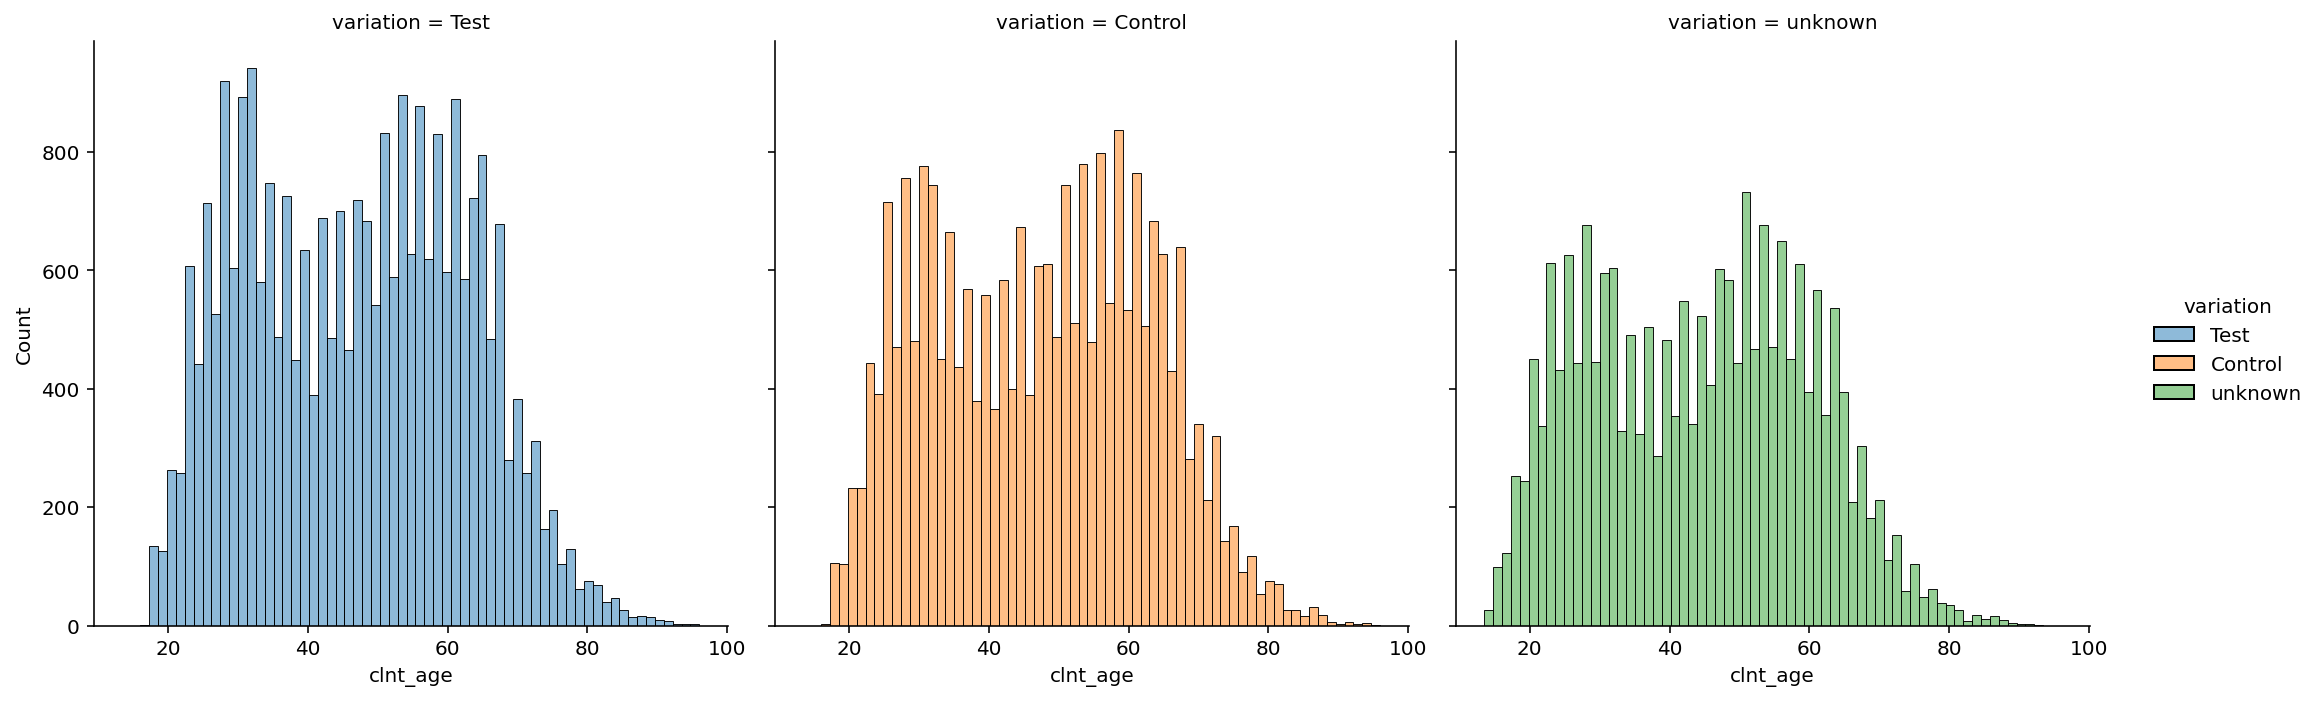

In [27]:
sns.displot(data=client_information_experiment, x="clnt_age",  hue="variation", col="variation")
plt.show()

<h2> Redesign Outcome: New design’s performance compared to the old one,  based on the chosen KPIs

In [28]:
web_data_summary_experiment = pd.merge(web_data_summary, df_final_experiement_clients, on='client_id', how='outer')
web_data_summary_experiment["variation"] = web_data_summary_experiment["variation"].fillna("Unknown")
web_data_summary_experiment["variation"].value_counts()
web_data_summary_experiment['duration'] = pd.to_timedelta(web_data_summary_experiment['duration'])

In [29]:
web_data_summary_experiment.head()

,client_id,no_of_visits,is_confirmed,duration,had_error,error_count,no_of_confirms,number_steps,variation
0,169,1,True,0 days 00:00:53.250000,False,0,1,5,Unknown
1,336,1,False,0 days 00:15:48,False,0,0,1,Unknown
2,546,1,True,0 days 00:00:33.250000,False,0,1,5,Unknown
3,555,1,True,0 days 00:00:39.500000,False,0,1,5,Test
4,647,1,True,0 days 00:01:34.250000,False,0,1,5,Test


In [30]:
web_data_summary_experiment.describe()

,client_id,no_of_visits,duration,error_count,no_of_confirms,number_steps
count,1.201570e+05,120157.000000,120157,120157.000000,120157.000000,120157.000000
mean,5.013372e+06,1.324201,0 days 00:01:13.051723046,0.624017,0.853101,4.103981
std,2.881872e+06,0.741575,0 days 00:01:37.557571523,1.183999,0.909968,1.447308
min,1.690000e+02,1.000000,0 days 00:00:00,0.000000,0.000000,1.000000
25%,2.521851e+06,1.000000,0 days 00:00:29.250000,0.000000,0.000000,4.000000
50%,5.020068e+06,1.000000,0 days 00:00:49.642857142,0.000000,1.000000,5.000000
75%,7.505650e+06,1.000000,0 days 00:01:25,1.000000,1.000000,5.000000
max,9.999875e+06,21.000000,0 days 01:18:13,30.000000,23.000000,5.000000


In [31]:
# Redesign Outcome
# Based on the chosen KPIs, how does the new design’s performance compare to the old one?

In [32]:
ab_test_groups = ["Test", "Control", "Unknown"]

def test_results(web_data_summary_experiment, variation):
    data_subset = web_data_summary_experiment.loc[web_data_summary_experiment["variation"] == variation]
    non_zero_confirm = data_subset.loc[data_subset["no_of_confirms"] != 0]["client_id"].count()
    had_error = data_subset.loc[data_subset["error_count"] != 0]["client_id"].count()
    total_count = data_subset["client_id"].count()
    avg_number_steps = data_subset["number_steps"].mean()
    error_rate = had_error/total_count
    completion_rate = non_zero_confirm/ total_count

    return completion_rate, error_rate, avg_number_steps
    

# Create an empty list to store dictionaries
result_data = []

# Fill the list with values
for variation in ab_test_groups:
    completion_rate_val, error_rate_val, avg_number_steps = test_results(web_data_summary_experiment, variation)
    result_data.append({"variation": variation, "completion rate": completion_rate_val, "error rate": error_rate_val, "number steps": avg_number_steps} )

# Create a DataFrame from the list of dictionaries
test_results = pd.DataFrame(result_data)
test_results

,variation,completion rate,error rate,number steps
0,Test,0.692932,0.378004,4.181697
1,Control,0.655873,0.343320,4.039393
2,Unknown,0.675079,0.346713,4.095712


In [33]:
web_data_summary_experiment['duration'] = pd.to_timedelta(web_data_summary_experiment['duration'])
web_data_summary_experiment_grouped = web_data_summary_experiment.groupby("variation").agg(
    client_id_count=('client_id', 'count'),
    avg_visits=('no_of_visits', 'mean'),
    total_visits=('no_of_visits', 'sum'),
    avg_duration=('duration', 'mean'),
    min_duration=('duration', 'min'),
    max_duration=('duration', 'max'),
    total_confirms=('no_of_confirms', 'sum'),
    avg_conf=('no_of_confirms', "mean"),
    avg_errors=('error_count', 'mean'),
    total_errors=('error_count', 'sum'),
)

web_data_summary_experiment_grouped.reset_index(inplace=True)
web_data_summary_experiment_grouped['avg_duration_m_s'] = web_data_summary_experiment_grouped['avg_duration'].apply(lambda x: f"{int(np.floor(x.total_seconds() / 60)):02d}:{int(round(x.total_seconds() % 60))}")
web_data_summary_experiment_grouped.insert(4, 'visits_percent', (web_data_summary_experiment_grouped['total_visits']/web_data_summary_experiment_grouped['total_visits'].sum()).round(2))
web_data_summary_experiment_grouped.insert(2, 'clients_percent', (web_data_summary_experiment_grouped['client_id_count']/web_data_summary_experiment_grouped['client_id_count'].sum()).round(2))
web_data_summary_experiment_grouped

,variation,client_id_count,clients_percent,avg_visits,total_visits,visits_percent,avg_duration,min_duration,max_duration,total_confirms,avg_conf,avg_errors,total_errors,avg_duration_m_s
0,Control,23532,0.20,1.370177,32243,0.20,0 days 00:01:11.694819541,0 days,0 days 01:03:35.833333333,17336,0.736699,0.565273,13302,01:12
1,Test,26968,0.22,1.379561,37204,0.23,0 days 00:01:13.568737177,0 days,0 days 01:05:53,25600,0.949273,0.707246,19073,01:14
2,Unknown,69657,0.58,1.287236,89665,0.56,0 days 00:01:13.309957197,0 days,0 days 01:18:13,59570,0.855190,0.611640,42605,01:13


In [34]:
duration_visit_test = web_data_summary_experiment_grouped[["variation","avg_duration_m_s"]]
test_results2 = pd.merge(test_results, duration_visit_test, how="outer",  on="variation")
test_results2

,variation,completion rate,error rate,number steps,avg_duration_m_s
0,Test,0.692932,0.378004,4.181697,01:14
1,Control,0.655873,0.343320,4.039393,01:12
2,Unknown,0.675079,0.346713,4.095712,01:13


In [35]:
with pd.ExcelWriter('test_results.xlsx') as writer:  
    test_results2.to_excel(writer, sheet_name='test_results', engine='xlsxwriter')
    web_data_summary_experiment_grouped.to_excel(writer, sheet_name='test_resuts_extended', engine='xlsxwriter')



In [36]:
web_data_summary_experiment

,client_id,no_of_visits,is_confirmed,duration,had_error,error_count,no_of_confirms,number_steps,variation
0,169,1,True,0 days 00:00:53.250000,False,0,1,5,Unknown
1,336,1,False,0 days 00:15:48,False,0,0,1,Unknown
2,546,1,True,0 days 00:00:33.250000,False,0,1,5,Unknown
3,555,1,True,0 days 00:00:39.500000,False,0,1,5,Test
4,647,1,True,0 days 00:01:34.250000,False,0,1,5,Test
...,...,...,...,...,...,...,...,...,...
120152,9999729,3,True,0 days 00:01:07.500000,True,2,1,5,Test
120153,9999768,1,True,0 days 00:00:44.181818181,True,3,1,5,Unknown
120154,9999832,1,False,0 days 00:00:08,False,0,0,2,Test
120155,9999839,1,True,0 days 00:00:49.600000,False,0,1,5,Unknown


### Client behavior analysis

- #### <span style='font-size:medium'>Who are the primary clients using this online process?</span>
- #### <span style='font-size:medium'>Are the primary clients younger or older, new or long\-standing?</span>



In [37]:
df_final_demo.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,7.059400e+04,70594.000000,70594.000000,70594.000000,70594.000000,7.059400e+04,70594.000000,70594.000000
mean,5.005026e+06,12.053007,150.659999,46.442240,2.255532,1.474467e+05,3.382469,5.566720
std,2.877289e+06,6.871850,82.090264,15.591273,0.535000,3.015106e+05,2.236595,2.353296
min,1.690000e+02,2.000000,33.000000,13.500000,1.000000,1.378942e+04,0.000000,1.000000
25%,2.519543e+06,6.000000,82.000000,32.500000,2.000000,3.734660e+04,1.000000,4.000000
50%,5.016974e+06,11.000000,136.000000,47.000000,2.000000,6.333459e+04,3.000000,5.000000
75%,7.483074e+06,16.000000,192.000000,59.000000,2.000000,1.375461e+05,6.000000,7.000000
max,9.999839e+06,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


In [38]:
bins = [0, 30, 60, 100]
labels = ['13-30', '30-60', '60+']

df_final_demo['age_category'] = pd.cut(df_final_demo['clnt_age'], bins=bins, labels = labels, right = False)
df_final_demo.head()

/tmp/ipykernel_227/1690943738.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_demo['age_category'] = pd.cut(df_final_demo['clnt_age'], bins=bins, labels = labels, right = False)


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,age_category
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,60+
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,30-60
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,30-60
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,30-60
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,30-60


<Axes: xlabel='age_category'>

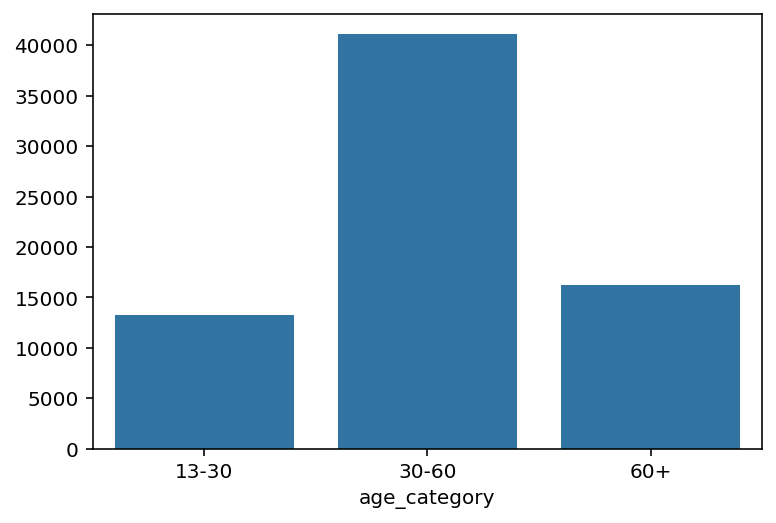

In [39]:
sns.barplot(x=df_final_demo['age_category'].value_counts().index, y = df_final_demo['age_category'].value_counts().values)

([<matplotlib.axis.XTick at 0x7f22d0985a20>,
 [Text(0.0, 0, 'U'), Text(1.0, 0, 'M'), Text(2.0, 0, 'F')])

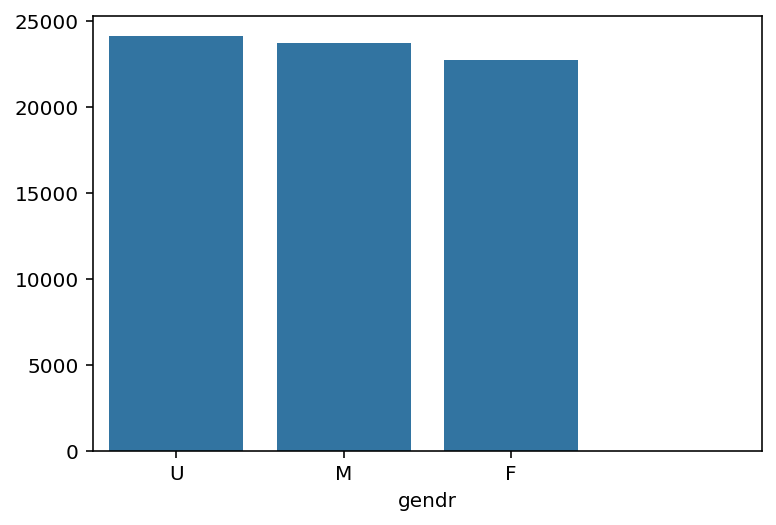

In [40]:
# comparason of clients based on GENDER

sns.barplot(x=df_final_demo['gendr'].value_counts().index, y = df_final_demo['gendr'].value_counts().values)

# hide X column
plt.xticks(ticks=['U', 'M', 'F'])


In [41]:
crosstab_age_logons = pd.crosstab(df_final_demo['logons_6_mnth'], df_final_demo['age_category'])
pd.DataFrame(crosstab_age_logons.reset_index())
# crosstab_age_logons.index_key()

age_category,logons_6_mnth,13-30,30-60,60+
0,1.0,691,1883,364
1,2.0,740,1837,432
2,3.0,1828,6582,1833
3,4.0,1918,6270,2032
4,5.0,1633,5379,2242
5,6.0,1378,4427,2073
6,7.0,2062,5335,2495
7,8.0,745,2701,1364
8,9.0,2304,6662,3384


In [42]:
df_final_demo.to_csv('df_final_demo1.csv', index=False)

<Axes: xlabel='logons_6_mnth'>

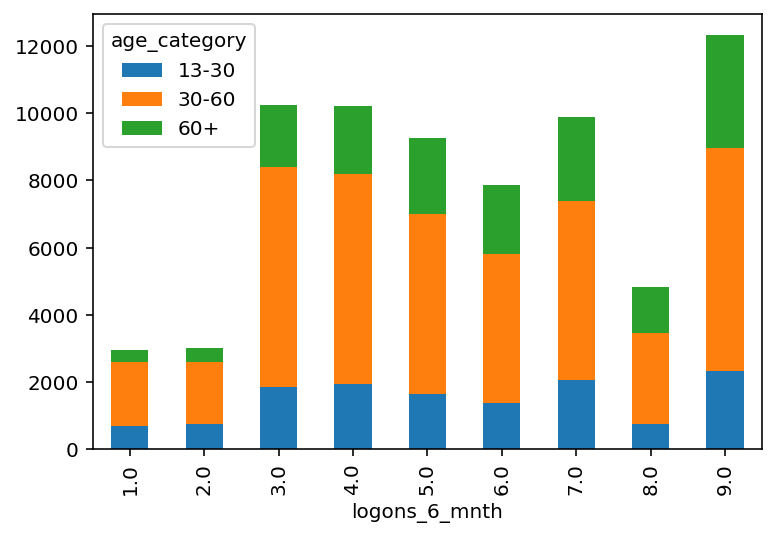

In [43]:
#category 30-60 seems to have the highest logons the past 6 months

crosstab_age_logons.plot(kind='bar', stacked=True)


<Axes: xlabel='age_category', ylabel='logons_6_mnth'>

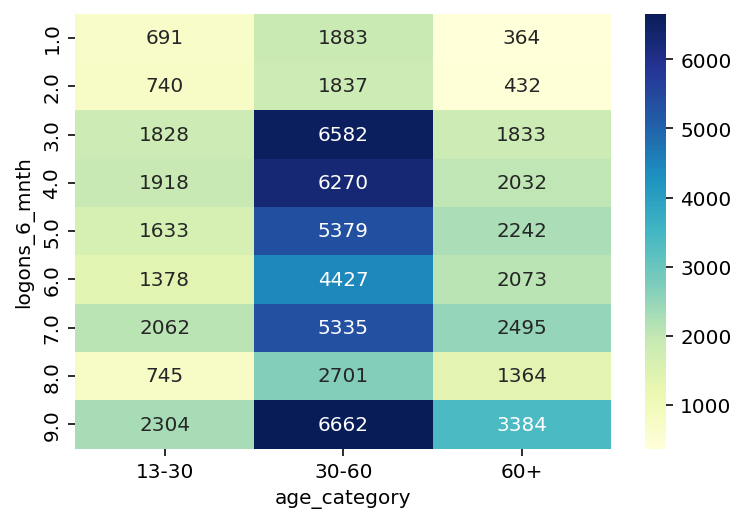

In [44]:
# heatmap also confirms that most of logons belongs to 30-60 of age

sns.heatmap(data=crosstab_age_logons, annot=True, cmap="YlGnBu", fmt="d")

Text(0.5, 1.0, 'Logons Per Person in Past 6 Months')

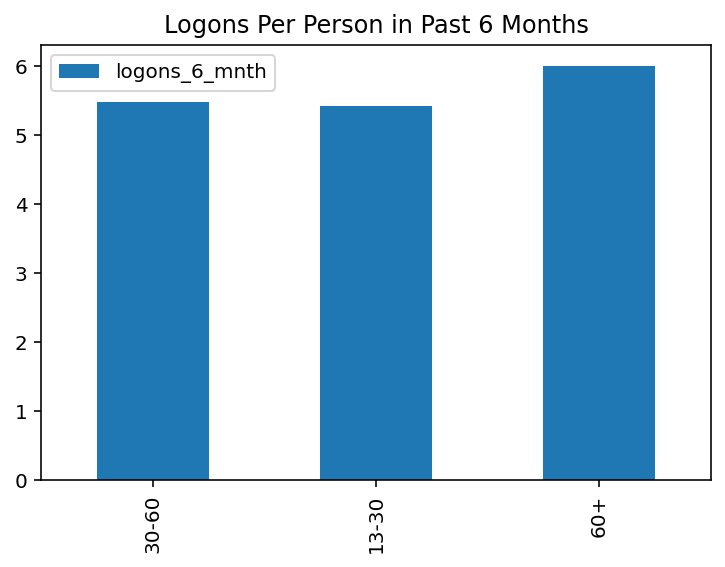

In [45]:
#Calculate each age range logins per person

login_per_person = pd.DataFrame()

login_per_person['30-60'] = pd.DataFrame(crosstab_age_logons['13-30'].index * crosstab_age_logons['13-30'].values).sum() / df_final_demo[df_final_demo['age_category'] == '13-30']['client_id'].count()

login_per_person['13-30'] = pd.DataFrame(crosstab_age_logons['13-30'].index * crosstab_age_logons['30-60'].values).sum() / df_final_demo[df_final_demo['age_category'] == '30-60']['client_id'].count()

login_per_person['60+'] = pd.DataFrame(crosstab_age_logons['13-30'].index * crosstab_age_logons['60+'].values).sum() / df_final_demo[df_final_demo['age_category'] == '60+']['client_id'].count()

login_per_person = login_per_person.transpose()

ax = login_per_person.plot(kind='bar')
plt.title('Logons Per Person in Past 6 Months')



Text(0.5, 1.0, 'Mean Balance for Each Logon Category')

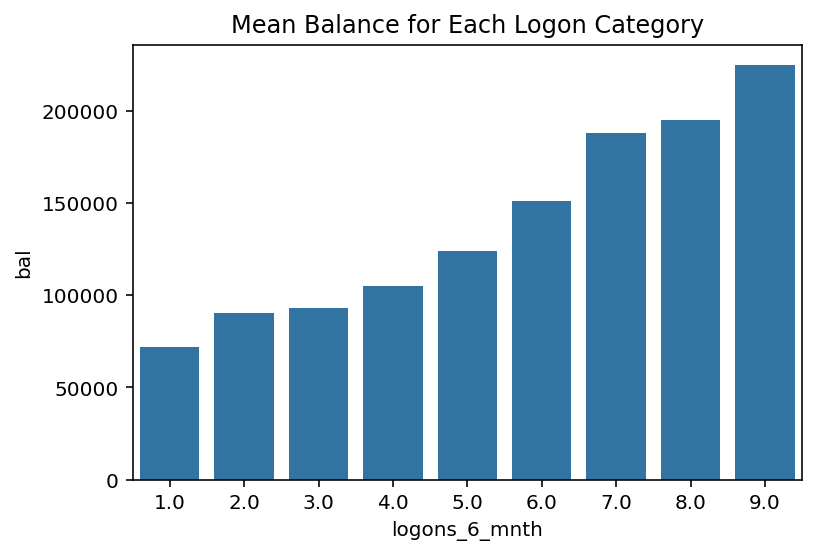

In [46]:
mean_balances = df_final_demo.groupby('logons_6_mnth')['bal'].mean().reset_index()

# Plotting the scatter plot with mean values
sns.barplot(data=mean_balances, x='logons_6_mnth', y='bal')
plt.title('Mean Balance for Each Logon Category')

# plt.show()

### Completion Rate: The proportion of users who reach the final ‘confirm’ step.



In [47]:
# number of unique clients reached CONFIRM 81145

df_final_web_data[df_final_web_data['process_step'] == 'confirm']['client_id'].nunique()

81145

In [48]:
# number of total unique client 
df_final_web_data['client_id'].nunique()

120157

([<matplotlib.patches.Wedge at 0x7f22cfeaa200>,
 [Text(-1.049423797902226, 0.3297115290620999, 'Others'),
  Text(1.0494238287720428, -0.3297114308079512, 'Client Reached Confirm')],
 [Text(-0.5724129806739414, 0.17984265221569085, '40.3%'),
  Text(0.5724129975120232, -0.1798425986225188, '59.7%')])

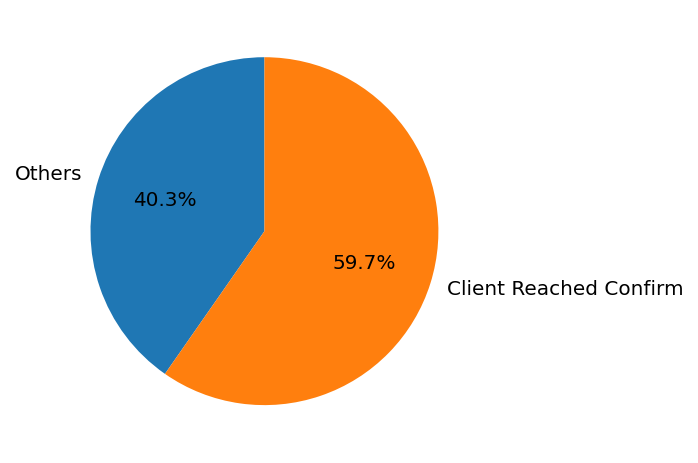

In [49]:
sizes = [df_final_web_data[df_final_web_data['process_step'] == 'confirm']['client_id'].nunique(), df_final_web_data['client_id'].nunique()]
labels = ['Others', 'Client Reached Confirm']
plt.pie(sizes,autopct='%1.1f%%', labels = labels, startangle=90)


### Completion Rate with a Cost-Effectiveness Threshold (Hypothesis Test)

The introduction of a new UI design comes with its associated costs: design, development, testing, potential training for staff, and possible short\-term disruptions or adjustments for users. To justify these costs, Vanguard has determined that any new design should lead to a minimum increase in the completion rate to be deemed cost\-effective.

Threshold: Vanguard has set this minimum increase in completion rate at 5%. This is the rate at which the projected benefits, in terms of increased user engagement and potential revenue, are estimated to outweigh the costs of the new design.

You are required to carry out another analysis, ensuring that the observed increase in completion rate from the A/B test meets or exceeds this 5% threshold. If the new design doesn’t lead to at least this level of improvement, it may not be justifiable from a cost perspective, regardless of its statistical significance.


In [50]:
web_data_summary_experiment.head()

,client_id,no_of_visits,is_confirmed,duration,had_error,error_count,no_of_confirms,number_steps,variation
0,169,1,True,0 days 00:00:53.250000,False,0,1,5,Unknown
1,336,1,False,0 days 00:15:48,False,0,0,1,Unknown
2,546,1,True,0 days 00:00:33.250000,False,0,1,5,Unknown
3,555,1,True,0 days 00:00:39.500000,False,0,1,5,Test
4,647,1,True,0 days 00:01:34.250000,False,0,1,5,Test


In [51]:
# COMPLETION RATE FROM CONTROL TO TEST. CALCULATE PERCENTAGE INCREASE

c_data1 = web_data_summary_experiment.loc[web_data_summary_experiment["variation"] == "Control"]["is_confirmed"]
t_data1 = web_data_summary_experiment.loc[web_data_summary_experiment["variation"] == "Test"]["is_confirmed"]
c_data1.count(), t_data1.count()

# print(f"completion rate increase (23532 > 26968): {((t_data1.count() - c_data1.count()) / c_data1.count()) * 100} %")

(23532, 26968)

In [52]:
# c_data1



In [53]:
web_data_summary_experiment.head()

,client_id,no_of_visits,is_confirmed,duration,had_error,error_count,no_of_confirms,number_steps,variation
0,169,1,True,0 days 00:00:53.250000,False,0,1,5,Unknown
1,336,1,False,0 days 00:15:48,False,0,0,1,Unknown
2,546,1,True,0 days 00:00:33.250000,False,0,1,5,Unknown
3,555,1,True,0 days 00:00:39.500000,False,0,1,5,Test
4,647,1,True,0 days 00:01:34.250000,False,0,1,5,Test


In [54]:
# t_data1.mean()

In [55]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Provided data
clients_test_version = t_data1.count() # 26968
clients_control_version = c_data1.count() # 23532

# Completion rates
completion_rate_control = 0.6559
completion_rate_test = 0.6929

# Calculate observed successes for the test version
observed_successes_test = int(completion_rate_test * clients_test_version)

# Total observations for the test version
total_obs_test = clients_test_version

# Threshold for cost-effectiveness
threshold = 0.05

# Perform the one-sample proportion test
stat, p_value = proportions_ztest(observed_successes_test, total_obs_test, threshold)

# Set significance level
alpha = 0.05

# Interpret Results
if p_value < alpha:
    print(f"p-value: {p_value} Reject the null hypothesis. The new design is cost-effective.")
else:
    print("Fail to reject the null hypothesis. The new design may not be cost-effective.")


p-value: 0.0 Reject the null hypothesis. The new design is cost-effective.


In [56]:
from statsmodels.stats.proportion import proportions_ztest
# from statsmodels.stats.proportion import proportions_ztest
df = web_data_summary_experiment

confirmed_c = df[df['variation'] == 'Control']['is_confirmed'].sum()
confirmed_t = df[df['variation'] == 'Test']['is_confirmed'].sum()
nobs_c = df[df['variation'] == 'Control']['is_confirmed'].count()
nobs_t = df[df['variation'] == 'Test']['is_confirmed'].count()


print('Control and Test Means', df[df['variation'] == 'Control']['is_confirmed'].mean(), df[df['variation'] == 'Test']['is_confirmed'].mean())
print()

# our our control and test group proportions statistically significally different
print('## Is the difference in the confirmation rates statistically significant? ##')

result = proportions_ztest([confirmed_c, confirmed_t], [nobs_c, nobs_t], alternative='two-sided')

print('P-Value for proportial z-test between control and test group: ', result[1])
print('- We reject the null hypothesis (confirmation rates are the same)')
print('- and have high confidence the difference in completion rates between the groups are significantly different')
print()

p_hat = df[df['variation'] == 'Test']['is_confirmed'].mean()
p_0 = df[df['variation'] == 'Control']['is_confirmed'].mean() * 1.05
p_0b = df[df['variation'] == 'Control']['is_confirmed'].mean() 

print('## Are we confident the test group has a completion rate 5% better than the control? ##')

result = proportions_ztest(confirmed_t, nobs_t, value=p_0, alternative='larger')

print('P-Value for greater proportial z-test vs control mean * 1.05: ', result[1])
print('- We can not reject the null hypothesis (test confirmation rate is 5% higher)')
print('- not confident we will see a 5% lift should we implement the changes')

Control and Test Means 0.6558728539860615 0.6929323642835954

## Is the difference in the confirmation rates statistically significant? ##
P-Value for proportial z-test between control and test group:  7.023933247581432e-19
- We reject the null hypothesis (confirmation rates are the same)
- and have high confidence the difference in completion rates between the groups are significantly different

## Are we confident the test group has a completion rate 5% better than the control? ##
P-Value for greater proportial z-test vs control mean * 1.05:  0.06442020077768941
- We can not reject the null hypothesis (test confirmation rate is 5% higher)
- not confident we will see a 5% lift should we implement the changes


In [3]:
from statsmodels.stats.proportion import proportions_ztest
# from statsmodels.stats.proportion import proportions_ztest
df = web_data_summary_experiment

confirmed_c = df[df['variation'] == 'Control']['is_confirmed'].sum()
confirmed_t = df[df['variation'] == 'Test']['is_confirmed'].sum()
nobs_c = df[df['variation'] == 'Control']['is_confirmed'].count()
nobs_t = df[df['variation'] == 'Test']['is_confirmed'].count()



p_hat = df[df['variation'] == 'Test']['is_confirmed'].mean()
p_0 = df[df['variation'] == 'Control']['is_confirmed'].mean() * 1.05
p_0b = df[df['variation'] == 'Control']['is_confirmed'].mean() 

print('## Are we confident the test group has a completion rate 5% better than the control? ##')

result = proportions_ztest(confirmed_t, nobs_t, value=p_0, alternative='larger')
result

NameError: name 'web_data_summary_experiment' is not defined

In [56]:
df_final_demo_gendr_var1 = df_final_demo[['client_id', 'gendr']]
df_final_demo_gendr_var1

df_final_demo_gendr_var2 = web_data_summary_experiment[['client_id', 'variation']]
df_final_demo_gendr_var2

merged_gendr_var = pd.merge(df_final_demo_gendr_var1, df_final_demo_gendr_var2, on='client_id', how='inner')
merged_gendr_var.head()



,client_id,gendr,variation
0,836976,U,Test
1,2304905,U,Control
2,1439522,U,Test
3,1562045,M,Test
4,5126305,F,Control


<Axes: xlabel='gendr', ylabel='count'>

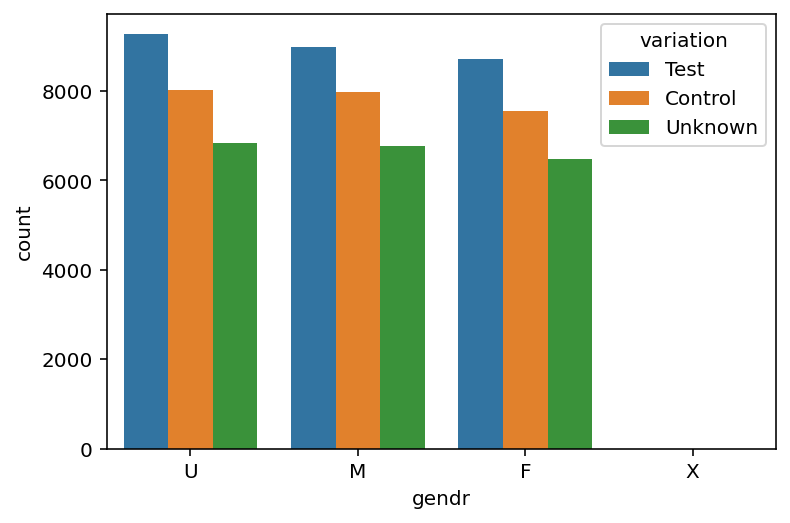

In [57]:
# COUNT OF GENDER OF CLIENTS BASED ON GENDER. IT SEEMS LIKE THE CLIENTS ARE EQUALLY DISTRIBUTED IN 'TEST' AND 'CONTROL'
sns.countplot(x='gendr', hue='variation', data=merged_gendr_var)


### **Experiment Evaluation**

You are also required to carry out an evaluation of the experiment by answering questions about the design effectiveness, duration and any additional data needs. See the full details below:

##### **Design Effectiveness:**

- Was the experiment well\-structured?

**Ans:** Yes, the experiment appears to be well\-structured. It has a clear and defined purpose: to determine whether a new UI and in\-context prompts can improve customer experience and lead to higher process completion rates. The experiment also has a well\-defined control group \(traditional online process\) and a test group \(new UI and in\-context prompts\). The experiment was conducted over a reasonable timeframe of three months, which should be sufficient to gather meaningful data and insights.

- Were clients randomly and equally divided between the old and new designs?

**Ans:** Yes. during analysis we observed that the clients were equally divided between old and new design.

- Were there any biases?

**Ans:**  There are significant amount of Unknown gender type in dataset which can effect the test result. Other than that, there doesn't seem to be any biases since the clients are equally divided and enough period of time was given for the test.



In [0]:
# web_data_summary_experiment.head()
# df_final_web_data.to_csv('df_final_web_data1.csv', index=False)


In [3]:
# df_final_demo.head()


web_data_summary_experiment[web_data_summary_experiment['is_confirmed'] == True].count()

# web_data_summary_experiment

NameError: name 'web_data_summary_experiment' is not defined

<h2> Hypothesis Testing

1. **Completion Rate**

Null Hypothesis H0:


The new design \(Test group\) had a higher completion rate compared to the old design \(Control group\),  differences observed are not statistically significant.
The 2 independent samples have identical average \(expected\) values

Alternative Hypothesis H1:

The new design \(Test group\) had a higher completion rate compared to the old design \(Control group\), and this difference is statistically significant

significance level, p-value, the statistical test prerequisites α = 0,05



In [0]:
def ind_testing(data1, data2):
    '''Defines a fonction that calculates the T-test for the means of two independent samples of scores
     the null hypothesis that 2 independent samples have identical average (expected) values. 
     This fonction assumes that the populations have different variances by default
      Take as paramaters 2 Data Frames '''
    pvalue = ttest_ind(data1, data2, axis=0, equal_var=False, alternative='two-sided').pvalue
    stat = ttest_ind(data1, data2, axis=0, equal_var=False, alternative='two-sided').statistic
    print(f"TtestResult statistic : {stat}")
    print(f"TtestResult pvalue: {pvalue}")
    if pvalue < 0.05:
        print("We reject the Null Hypothesis")
    else:
        print("We can`t reject the Null Hypothesis")
    return  stat, pvalue

In [0]:
c_data = web_data_summary_experiment.loc[web_data_summary_experiment["variation"] == "Control"]["is_confirmed"]
t_data = web_data_summary_experiment.loc[web_data_summary_experiment["variation"] == "Test"]["is_confirmed"]
print(f"Size Group 'Clients Test Version':  {t_data .count()}")
print(f"Size Group 'Clients Control Version' {c_data .count()}")
print(f"Average Confirm'Clients Test Version' {t_data .mean().round(4)}")
print(f"Average Confirm 'Clients Control Version' {c_data .mean().round(4)}")

In [0]:
ind_testing(c_data, t_data)

1. **Completion Rate using Two Proportions Z\-test**

Two proportion z-test allows to compare two proportions to see if they are the same. 
Null Hupotthesis H0:
The null hypothesis for the test is that the proportions of clients who confirmed in the Vanguard 'test version' and the 'control version' are the same. 

Alternative Hypothesis H1
The alternate hypothesis (H1) for the test is that the proportions of clients who confirmed in the Vanguard 'test version' and the 'control version' are not the same



In [0]:
#z-test (two proportions)

from statsmodels.stats.proportion import proportions_ztest

# Count of successes (True values) and total number of observations for Control group
c_success = c_data.sum()
c_total = len(c_data)

# Count of successes (True values) and total number of observations for Test group
t_success = t_data.sum()
t_total = len(t_data)


stat, p_value = proportions_ztest([c_success, t_success], [c_total, t_total])
print(f'Z-statistic: {stat}')
print(f'Z-test P-value: {p_value}')
if p_value < 0.05:
    print("Reject the null hypothesis - There is a significant difference between groups.")
else:
    print("Fail to reject the null hypothesis - There is no significant difference between groups.")


We reject the null hypothesis. The new design (Test group)  had a higher completion rate compared to the old design (Control group), and this difference is statistically significant



2. **''''''**



In [0]:
Confirm_Control = web_data_summary_experiment[web_data_summary_experiment['variation'] == 'Control']
Confirm_Control.count()

In [0]:
Confirm_Test = web_data_summary_experiment[web_data_summary_experiment['variation'] == 'Test']['variation'].count()

In [0]:
# increase_rate = Confirm_Control / 

3. **Other Hypothesis**

Null Hypothesis H0:

The average age of clients engaging with the new process is the same as those engaging with the old process \(the samples are drawn from populations with the same population means\)

Alternative Hypothesis H1:

The average age of clients engaging with the new process is not the same as those engaging with the old process \(the samples are drawn from populations with different population means\)

significance level, p-value,
the statistical test prerequisites α = 0,05 confidence_interval(confidence_level=0.95)



In [0]:
client_information_experiment.head()

In [0]:
client_information_experiment.shape

In [0]:
client_age_test = client_information_experiment.loc[client_information_experiment["variation"] == "Test"]["clnt_age"]
client_age_control= client_information_experiment.loc[client_information_experiment["variation"] == "Control"]["clnt_age"]

print(f"Size Group 'Clients Test Version':  {client_age_test.count()}")
print(f"Size Group 'Clients Control Version' {client_age_control.count()}")
print(f"Average Age'Clients Test Version' {client_age_test.mean().round(2)}")
print(f"Average Age 'Clients Control Version' {client_age_control.mean().round(2)}")

In [0]:
ind_testing(client_age_test, client_age_control) #ttest_ind

We reject the Null Hypothesis that  "The average age of clients engaging with the new process is the same as those engaging with the old process \(the samples are drawn from populations with the same population means\)

Nevertheless, we can note that this difference between averages is minimal:

Average Age Clients Test Group 47.16
Average Age Clients Control Group 47.50



3) Other Hypothesis - Number of Errors
Null Hypothesis H0:
The number of errors among clients engaging with the new process is the same as those engaging with the old process (the samples are drawn from populations with the same population means)

Alternative Hypothesis H1:
The number of errors among clients engaging with the new process is  not the same as those engaging with the old process (the samples are not drawn from populations with the same population means)

significance level, p-value, 
the statistical test prerequisites α = 0,05 confidence_interval(confidence_level=0.95)



In [0]:
c_error = web_data_summary_experiment.loc[web_data_summary_experiment["variation"] == "Control"]["error_count"]
t_error = web_data_summary_experiment.loc[web_data_summary_experiment["variation"] == "Test"]["error_count"]
print(f"Size Group 'Clients Test Version':  {t_error .count()}")
print(f"Size Group 'Clients Control Version' {c_error .count()}")
print(f"Average Number of Errors 'Clients Test Version' {t_error .mean().round(4)}")
print(f"Average Number of Errors 'Clients Control Version' {c_error .mean().round(4)}")

In [0]:
ind_testing(c_error, t_error)

In [0]:
c_conf_number = web_data_summary_experiment.loc[web_data_summary_experiment["variation"] == "Control"]["no_of_confirms"]
t_conf_number = web_data_summary_experiment.loc[web_data_summary_experiment["variation"] == "Test"]["no_of_confirms"]
print(f"Size Group 'Clients Test Version':  {t_conf_number .count()}")
print(f"Size Group 'Clients Control Version' {c_conf_number .count()}")
print(f"Average Number of Confirms 'Clients Test Version' {t_conf_number .mean().round(4)}")
print(f"Average Number of Confirms 'Clients Control Version' {c_conf_number .mean().round(4)}")

ind_testing(c_conf_number, t_conf_number)

In [0]:
c_steps_number = web_data_summary_experiment.loc[web_data_summary_experiment["variation"] == "Control"]["number_steps"]
t_steps_number = web_data_summary_experiment.loc[web_data_summary_experiment["variation"] == "Test"]["number_steps"]
print(f"Size Group 'Clients Test Version':  {t_steps_number .count()}")
print(f"Size Group 'Clients Control Version' {c_steps_number .count()}")
print(f"Average Number of Steps 'Clients Test Version' {t_steps_number .mean().round(4)}")
print(f"Average Number of Steps 'Clients Control Version' {c_steps_number .mean().round(4)}")

ind_testing(c_steps_number, t_steps_number)

<h2>Preparing Data and Exporting it to use in "Tableau"

In [0]:
with pd.ExcelWriter('test_results.xlsx') as writer:  
    test_results2.to_excel(writer, sheet_name='test_results', engine='xlsxwriter')
    web_data_summary_experiment_grouped.to_excel(writer, sheet_name='test_resuts_extended', engine='xlsxwriter')


In [0]:
# web_data_summary_experiment.reset_index().to_excel('web_data_summary_experiment2.xlsx', index=False)

In [0]:
df_final_experiement_clients.head()

In [0]:
bins = [0, 30, 60, 100]
labels = ['13-30', '30-60', '60+']
client_information_experiment['age_category'] = pd.cut(client_information_experiment['clnt_age'], bins=bins, labels = labels, right = False)
client_information_experiment.reset_index().to_csv('client_information_experiment.csv', index=False)

In [0]:
web_data_experiment = df_final_web_data.merge(df_final_experiement_clients, on="client_id", how="left")
web_data_experiment["variation"] = web_data_experiment["variation"].fillna("Unknown")
web_data_experiment.head()

In [0]:
# web_data_experiment.reset_index().to_csv('df_final_web_data.csv', index=False)

In [0]:
web_data_clients_info = df_final_web_data.merge(client_information_experiment, on="client_id", how="left")
web_data_clients_info["variation"] = web_data_clients_info["variation"].fillna("Unknown")
web_data_clients_info["gendr"] = web_data_clients_info["gendr"].fillna("U")
web_data_clients_info['age_category'] = web_data_clients_info['age_category'].astype(str).fillna("Unknown")
web_data_clients_info.dtypes

In [0]:
web_data_summary_clients_info = web_data_summary.merge(client_information_experiment, on="client_id", how="left")
web_data_summary_clients_info["gendr"] = web_data_summary_clients_info["gendr"].fillna("U")
web_data_summary_clients_info["variation"] = web_data_summary_clients_info["variation"].fillna("Unknown")
web_data_summary_clients_info['age_category'] = web_data_summary_clients_info['age_category'].astype(str).fillna("Unknown")
web_data_summary_clients_info.reset_index().to_csv ('web_data_summary_clients_info.csv', index=False)

In [0]:
web_data_summary_clients_info.head()

In [0]:
web_data_summary_clients_info.reset_index().to_excel('web_data_summary_clients_info3.csv', index=False)
